In [1]:
# !pipenv install selenium

In [2]:
# !pipenv install webdriver-manager

In [2]:
from selenium import webdriver
from selenium.webdriver.firefox.service import Service as FirefoxService
from webdriver_manager.firefox import GeckoDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait

driver = webdriver.Firefox(service=FirefoxService(GeckoDriverManager().install()))
driver.get("https://web.whatsapp.com/")



try:
    # Wait for the QR code element to appear within 40 seconds
    qr_code_element = WebDriverWait(driver, 40).until(
        EC.presence_of_element_located((By.CLASS_NAME, "_10aH-"))
    )
    print("QR code scanned successfully!")


except:
    # If the QR code element is not found within 40 seconds, stop with an error message
    print("Error: Unable to scan QR code within 40 seconds!")
    driver.quit()

message = "Scan QR Code To Login"
driver.execute_script(f"alert('{message}')")


QR code scanned successfully!


In [3]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Wait for the element to be clickable
element=driver.find_element(By.CLASS_NAME,'to2l77zo.gfz4du6o.ag5g9lrv.bze30y65.kao4egtt.qh0vvdkp')

In [204]:
name=input('Enter the name You want to analysis')

Enter the name You want to analysis Abdullah home


In [5]:
for word in name:
    element.clear()  # Clear the previous input
    element.send_keys(word)

In [6]:
found=driver.find_element(By.CLASS_NAME,'_8nE1Y')
found.click()

In [59]:
from selenium.webdriver.common.keys import Keys
# Scroll up by pressing the Page Up key
body = driver.find_element(By.TAG_NAME,"body")
body.send_keys(Keys.PAGE_UP)

# Alternatively, you can scroll by executing JavaScript code
driver.execute_script("window.scrollBy(0, -window.innerHeight);")

In [60]:
chats=driver.find_elements(By.CLASS_NAME,'_21Ahp')
for i in chats:
    print(i.text)

Paper kiddan da hua
Alhmdullilah
Acha
Chalo ma shaa Allah
Paper kiddan hua
Acha
Chalo ma shaa Allah
Kinnei reh gai?
1
Matlab kal last
Nii Monday nu
2 chuttian mazei wesei tu te kehendi huni ho jaaanda kal
G
Ghr Jana phr
Matlab Monday nu
G
Oka
Paper kiddan d hua
Alhmdullilah acha
Chalo ma shaa Allah
Mubarak howei
Mid Paper end
G
hun kaaar jaaa rhi
Nhi 
Classes
Acha kal anti das rhei si aaaa jaaana
Yaaani zikr hoya te gal kr rei si
Nii..HOD ne off nhi kita c
Onei amb lenei si paper le ke
Pta nii
Khndi me personally attendance short kr deni
Chalo mazei fr
Ni
Kyun kia hua
Kuch nhi
Matlab fr ni kyun
Yani mze nii
Hmmm menu idea how ria kinna mushkil kisei ho kaaar rehna te tu te fr hostel aaaan
Tu Kise hor kr Rh ria?
From more than 1 month

Hmmm
Taya g
Menu roz 3 tu 4 km chalan di aaaadat aaa
Lekin ithei ghar bound ho ke reh gia
Ki mtlb
Yaaani bhai farukh kil aaaaya hua
Sae sae
Aanti log??
O ghar
Saeee
Sundas no rkh Lena c
O wi ghar
Rkh Lena c ithe
Nai menu akelei kuch hunda ni kadei lekin p

In [62]:
!pipenv install pandas

Installing pandas...
⠼ ✔ Installation Succeeded
Pipfile.lock (bf512f) out of date, updating to (1a522e)...
Locking [packages] dependencies...
⠸ ✔ Success!dependencies.....
Locking [dev-packages] dependencies...
Updated Pipfile.lock (626b2f19d904b7f9edf2bb7ac2f39b30c71bee5c1894c69ec1fa5dc1221a522e)!
Installing dependencies from Pipfile.lock (1a522e)...


In [66]:
chat=[]
for i in chats:
    chat.append(i.text)

In [63]:
import pandas as pd

In [180]:
df=pd.DataFrame({'Chatting':chat})

In [181]:
df

,Chatting
0,Paper kiddan da hua
1,Alhmdullilah
2,Acha
3,Chalo ma shaa Allah
4,Paper kiddan hua
...,...
281,Me khud
282,Ok OK sorry
283,Kes laae
284,Odanhi


In [69]:
df.to_csv('Friend_chatting')

In [70]:
df.shape

(286, 1)

In [182]:
# Define a regular expression pattern to match links
pattern = r'(https?://\S+)'
df['link_count'] = df['Chatting'].str.count(pattern)

In [183]:
df['word_count'] = df['Chatting'].apply(lambda x: len(x.split()))

In [184]:
df['sentence_length'] = df['Chatting'].apply(lambda x: len(x))

In [185]:
df['has_numeric'] = df['Chatting'].apply(lambda x: any(char.isdigit() for char in x))

In [186]:
emoticons = [':)', ':(', ';)', ':D', ':P']

df['has_emoticon'] = df['Chatting'].apply(lambda x: any(emoticon in x for emoticon in emoticons))

In [82]:
!pipenv install langdetect

Installing langdetect...
⠴ ✔ Installation Succeeded..
Pipfile.lock (1a522e) out of date, updating to (7142e9)...
Locking [packages] dependencies...
⠸ ✔ Success!dependencies.....
Locking [dev-packages] dependencies...
Updated Pipfile.lock (0e16da15ca80754155fd5ed4a123646722825d474062267df8929a4b387142e9)!
Installing dependencies from Pipfile.lock (7142e9)...


In [187]:
from langdetect import detect

# Define a function for language detection
def detect_language(text):
    # Preprocess Romanized Urdu text
    if any(ord(char) > 128 for char in text):
        # Replace Urdu characters with empty string
        text = ''.join(char for char in text if ord(char) <= 128)
    
    try:
        return detect(text)
    except:
        return 'Unknown'

# Apply language detection to the 'Chatting' column
df['language_detection'] = df['Chatting'].apply(detect_language)


In [88]:
!pipenv install py3langid

Installing py3langid...
⠏ ✔ Installation Succeeded.
Pipfile.lock (7142e9) out of date, updating to (765883)...
Locking [packages] dependencies...
⠸ ✔ Success!dependencies.....
Locking [dev-packages] dependencies...
Updated Pipfile.lock (3c11eedd618968b6d482767c9ec4ec9830e65eaa09babc94656c5d697f765883)!
Installing dependencies from Pipfile.lock (765883)...


In [188]:
import py3langid

def detect_language(text):
    lang, confidence = py3langid.classify(text)
    return lang, confidence

df[['language_py3_detection', 'py3_confidence']] = df['Chatting'].apply(detect_language).apply(pd.Series)


In [189]:
df

,Chatting,link_count,word_count,sentence_length,has_numeric,has_emoticon,language_detection,language_py3_detection,py3_confidence
0,Paper kiddan da hua,0,4,19,False,False,id,eu,-50.790157
1,Alhmdullilah,0,1,12,False,False,tr,et,-17.154526
2,Acha,0,1,4,False,False,en,en,9.061840
3,Chalo ma shaa Allah,0,4,19,False,False,so,fi,-30.708176
4,Paper kiddan hua,0,3,16,False,False,id,en,-44.714024
...,...,...,...,...,...,...,...,...,...
281,Me khud,0,2,7,False,False,vi,en,0.696291
282,Ok OK sorry,0,3,11,False,False,no,en,9.061840
283,Kes laae,0,2,8,False,False,et,et,-9.146299
284,Odanhi,0,1,6,False,False,vi,pt,-0.032771


In [190]:
df.columns

Index(['Chatting', 'link_count', 'word_count', 'sentence_length',
       'has_numeric', 'has_emoticon', 'language_detection',
       'language_py3_detection', 'py3_confidence'],
      dtype='object')

In [102]:
!pipenv install nltk

Installing nltk...
⠴ ✔ Installation Succeeded
Pipfile.lock (765883) out of date, updating to (377786)...
Locking [packages] dependencies...
⠏ ✔ Success!dependencies.....
Locking [dev-packages] dependencies...
Updated Pipfile.lock (61c6546bda456e557ca4f9204dfcce67237da5adac750d1eac8fad0b5b377786)!
Installing dependencies from Pipfile.lock (377786)...


In [107]:
import nltk
from nltk.corpus import stopwords

In [106]:
nltk.__version__

'3.8.1'

In [109]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/ahsan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [191]:
# Stopword Count
stopwords_set = set(stopwords.words('english'))
df['stopword_count'] = df['Chatting'].apply(lambda x: len([w for w in x.lower().split() if w in stopwords_set]))

In [192]:
# Repeated Characters Count
df['repeated_chars_count'] = df['Chatting'].apply(lambda x: sum(1 for i in range(len(x)-1) if x[i] == x[i+1]))

In [114]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ahsan/nltk_data...


In [193]:
sid = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['Chatting'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [116]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ahsan/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [118]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ahsan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [194]:
def count_pos_tags(text):
    pos_tags = nltk.pos_tag(nltk.word_tokenize(text))
    counts = {}
    for _, tag in pos_tags:
        counts[tag] = counts.get(tag, 0) + 1
    return counts

df['pos_tag_counts'] = df['Chatting'].apply(count_pos_tags)

In [120]:
!pipenv install textstat

Installing textstat...
⠇ ✔ Installation Succeeded
Pipfile.lock (377786) out of date, updating to (36c7db)...
Locking [packages] dependencies...
⠙ ✔ Success!dependencies.....
Locking [dev-packages] dependencies...
Updated Pipfile.lock (e4d14bcaa8d6fb37b93b9b6565ca3f205477f093b3e88085d00ed20d6736c7db)!
Installing dependencies from Pipfile.lock (36c7db)...


In [122]:
# Text Complexity (example using textstat library)
import textstat

In [195]:
df['flesch_reading_ease'] = df['Chatting'].apply(textstat.flesch_reading_ease)
df['gunning_fog_index'] = df['Chatting'].apply(textstat.gunning_fog)

In [125]:
df['gunning_fog_index'] 

0       1.6
1      40.4
2       0.4
3       1.6
4       1.2
       ... 
281     0.8
282     1.2
283     0.8
284     0.4
285     0.4
Name: gunning_fog_index, Length: 286, dtype: float64

In [128]:
df['pos_tag_counts']

0      {'NNP': 1, 'VBZ': 1, 'NN': 2}
1                          {'NN': 1}
2                          {'NN': 1}
3                {'NNP': 2, 'NN': 2}
4      {'NNP': 1, 'VBZ': 1, 'NN': 1}
                   ...              
281              {'NNP': 1, 'NN': 1}
282              {'NNP': 2, 'NN': 1}
283              {'NNP': 1, 'NN': 1}
284                        {'NN': 1}
285                        {'NN': 1}
Name: pos_tag_counts, Length: 286, dtype: object

In [129]:
df['sentiment_score']

0      0.0000
1      0.0000
2      0.0000
3      0.0000
4      0.0000
        ...  
281    0.0000
282    0.5904
283    0.0000
284    0.0000
285    0.0000
Name: sentiment_score, Length: 286, dtype: float64

In [131]:
!pipenv install scikit-learn

Installing scikit-learn...
⠴ ✔ Installation Succeeded....
Pipfile.lock (36c7db) out of date, updating to (a4a794)...
Locking [packages] dependencies...
⠇ ✔ Success!dependencies.....
Locking [dev-packages] dependencies...
Updated Pipfile.lock (90c76a82b48b5008b44ad754d8f2c1b6da8d970c8dfce4952adbb231a8a4a794)!
Installing dependencies from Pipfile.lock (a4a794)...


In [202]:
df.to_csv('Feature_Engineering')

In [196]:
from sklearn.feature_extraction.text import CountVectorizer

# Create an instance of CountVectorizer
vectorizer_1 = CountVectorizer()

# Apply count vectorization on the 'Chatting' column
count_vectors = vectorizer_1.fit_transform(df['Chatting'])

# Convert the count vectors to a DataFrame
count_vector_df = pd.DataFrame(count_vectors.toarray(), columns=vectorizer_1.get_feature_names_out())


In [197]:
count_vector_df

,11,49,65,77,95,aa,aaa,aaaa,aaaaaa,aaaaaaaa,...,yani,yes,yess,yesss,you,zara,zikr,zindagi,zor,zyada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [198]:
vectorizer_1.get_feature_names_out()

array(['11', '49', '65', '77', '95', 'aa', 'aaa', 'aaaa', 'aaaaaa',
       'aaaaaaaa', 'aaaadat', 'aaaai', 'aaaan', 'aaaaya', 'aaai', 'aaaj',
       'aaan', 'aaaya', 'aaaye', 'aaho', 'aaj', 'aale', 'aalia', 'aanti',
       'aaya', 'acahank', 'ach', 'acha', 'ache', 'achi', 'aeda', 'aehi',
       'aeis', 'aes', 'aese', 'aesi', 'aethe', 'agei', 'agge', 'agia',
       'aik', 'aj', 'ak', 'akar', 'akelei', 'alaikum', 'alhamdulillah',
       'alhmdullilah', 'allah', 'almost', 'amb', 'ameen', 'ami', 'an',
       'anti', 'app', 'arsa', 'assalam', 'attendance', 'ba', 'baaad',
       'baad', 'baaki', 'bachei', 'bahir', 'ban', 'band', 'bania', 'bare',
       'basic', 'bd', 'beta', 'beth', 'betha', 'bhai', 'bhool', 'bht',
       'bhulaiya', 'bilkul', 'bna', 'bnaa', 'bnai', 'bol', 'bound', 'bs',
       'buhat', 'bula', 'but', 'calculate', 'canteen', 'cgpa', 'ch',
       'chah', 'chal', 'chala', 'chalan', 'chalo', 'chalun', 'check',
       'cheez', 'chei', 'chitistian', 'chl', 'cho', 'chutia', 'chutt

In [199]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of TfidfVectorizer
vectorizer_2 = TfidfVectorizer()

# Apply TF-IDF vectorization on the 'Chatting' column
tfidf_vectors = vectorizer_2.fit_transform(df['Chatting'])

# Convert the TF-IDF vectors to a DataFrame
tfidf_vector_df = pd.DataFrame(tfidf_vectors.toarray(), columns=vectorizer_2.get_feature_names_out())


In [200]:
tfidf_vector_df

,11,49,65,77,95,aa,aaa,aaaa,aaaaaa,aaaaaaaa,...,yani,yes,yess,yesss,you,zara,zikr,zindagi,zor,zyada
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
from sklearn.metrics.pairwise import cosine_similarity

In [141]:
!pipenv install seaborn

Installing seaborn...
⠇ ✔ Installation Succeeded
Pipfile.lock (a4a794) out of date, updating to (f35465)...
Locking [packages] dependencies...
⠹ ✔ Success!dependencies.....
Locking [dev-packages] dependencies...
Updated Pipfile.lock (6ac1f68291920a203d456208cf9279476450943a20fd265c9d3640fff4f35465)!
Installing dependencies from Pipfile.lock (f35465)...


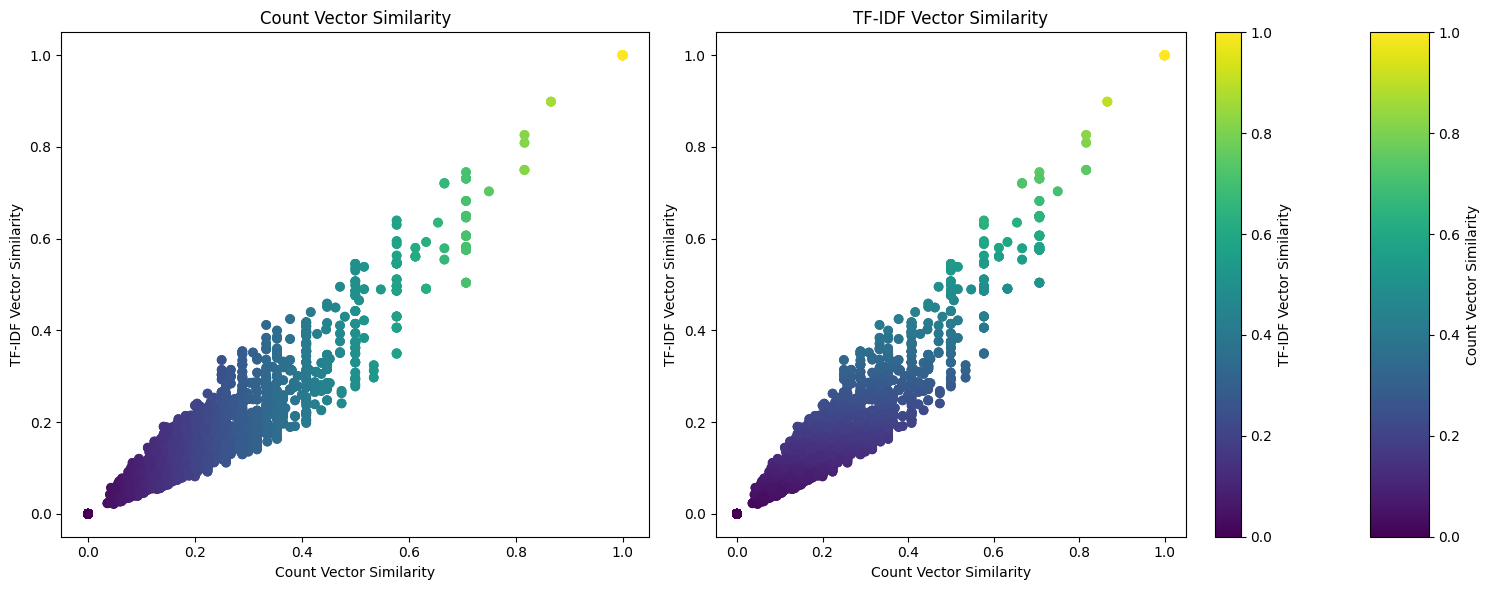

In [201]:
import matplotlib.pyplot as plt
import numpy as np

# Compute cosine similarity between count vectors
count_cosine_similarity = cosine_similarity(count_vectors)

# Compute cosine similarity between TF-IDF vectors
tfidf_cosine_similarity = cosine_similarity(tfidf_vectors)

# Flatten the similarity matrices
count_sim_flat = count_cosine_similarity.flatten()
tfidf_sim_flat = tfidf_cosine_similarity.flatten()

# Create the advanced scatter plot using matplotlib
fig, (ax1, ax2, ax_cb) = plt.subplots(1, 3, figsize=(15, 6), gridspec_kw={'width_ratios': [1, 1, 0.1]})

# Scatter plot for count vectors
scatter_count = ax1.scatter(count_sim_flat, tfidf_sim_flat, c=count_sim_flat, cmap='viridis')
ax1.set_xlabel('Count Vector Similarity')
ax1.set_ylabel('TF-IDF Vector Similarity')
ax1.set_title('Count Vector Similarity')

# Scatter plot for TF-IDF vectors
scatter_tfidf = ax2.scatter(count_sim_flat, tfidf_sim_flat, c=tfidf_sim_flat, cmap='viridis')
ax2.set_xlabel('Count Vector Similarity')
ax2.set_ylabel('TF-IDF Vector Similarity')
ax2.set_title('TF-IDF Vector Similarity')

# Colorbar for count vectors
cbar_count = plt.colorbar(scatter_count, cax=ax_cb)
cbar_count.set_label('Count Vector Similarity')

# Colorbar for TF-IDF vectors
cbar_tfidf = plt.colorbar(scatter_tfidf, ax=ax2)
cbar_tfidf.set_label('TF-IDF Vector Similarity')

# Show the plot
plt.tight_layout()
plt.show()


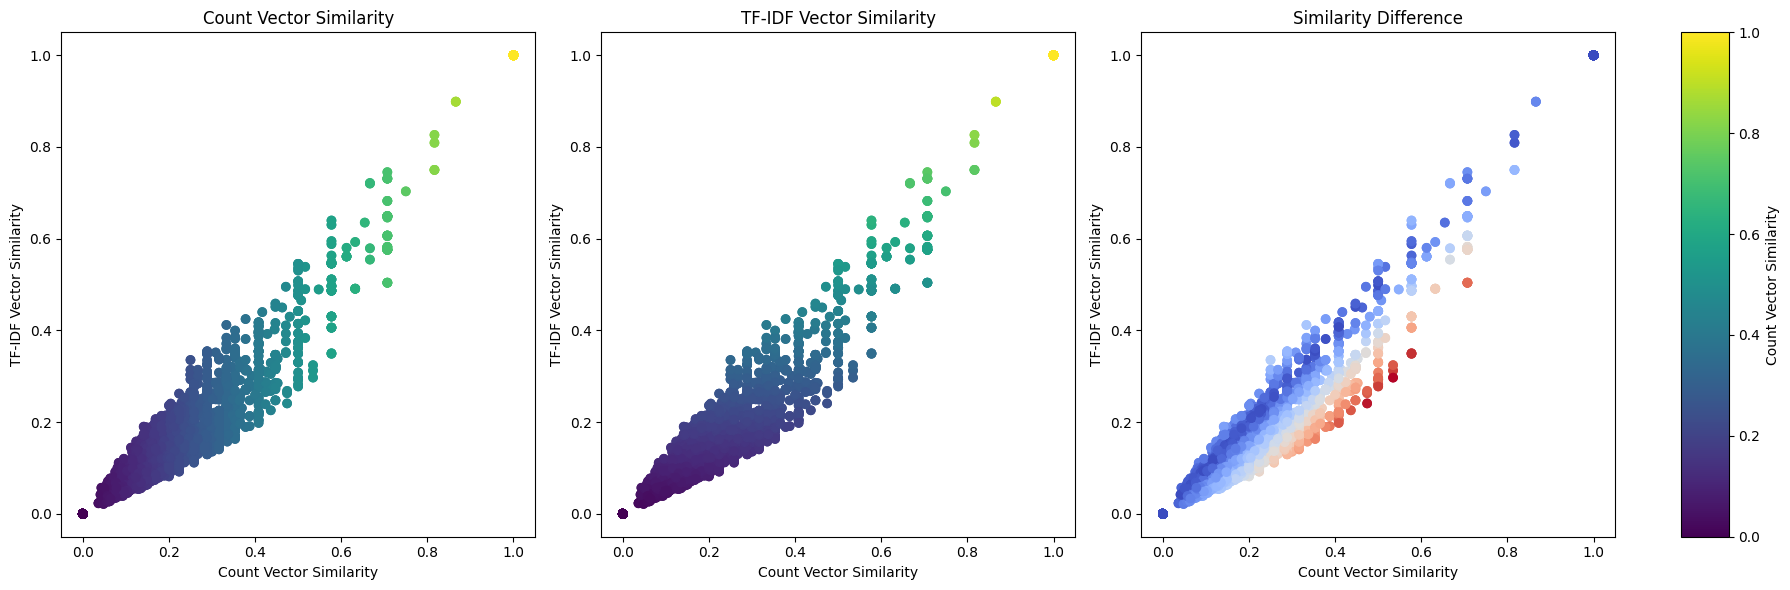

In [148]:
import matplotlib.pyplot as plt
import numpy as np

# Compute cosine similarity between count vectors
count_cosine_similarity = cosine_similarity(count_vectors)

# Compute cosine similarity between TF-IDF vectors
tfidf_cosine_similarity = cosine_similarity(tfidf_vectors)

# Flatten the similarity matrices
count_sim_flat = count_cosine_similarity.flatten()
tfidf_sim_flat = tfidf_cosine_similarity.flatten()

# Compute the difference between count vector and TF-IDF vector similarities
similarity_difference = np.abs(count_sim_flat - tfidf_sim_flat)

# Create the advanced scatter plot using matplotlib
fig, (ax1, ax2, ax3, ax_cb) = plt.subplots(1, 4, figsize=(18, 6), gridspec_kw={'width_ratios': [1, 1, 1, 0.1]})

# Scatter plot for count vectors
scatter_count = ax1.scatter(count_sim_flat, tfidf_sim_flat, c=count_sim_flat, cmap='viridis')
ax1.set_xlabel('Count Vector Similarity')
ax1.set_ylabel('TF-IDF Vector Similarity')
ax1.set_title('Count Vector Similarity')

# Scatter plot for TF-IDF vectors
scatter_tfidf = ax2.scatter(count_sim_flat, tfidf_sim_flat, c=tfidf_sim_flat, cmap='viridis')
ax2.set_xlabel('Count Vector Similarity')
ax2.set_ylabel('TF-IDF Vector Similarity')
ax2.set_title('TF-IDF Vector Similarity')

# Scatter plot for similarity difference
scatter_diff = ax3.scatter(count_sim_flat, tfidf_sim_flat, c=similarity_difference, cmap='coolwarm')
ax3.set_xlabel('Count Vector Similarity')
ax3.set_ylabel('TF-IDF Vector Similarity')
ax3.set_title('Similarity Difference')

# Colorbar for count vectors
cbar_count = plt.colorbar(scatter_count, cax=ax_cb)
cbar_count.set_label('Count Vector Similarity')

# Show the plot
plt.tight_layout()
plt.show()


In [156]:


# Get the vocabulary of CountVectorizer
count_vocab = vectorizer_1.vocabulary_

# Count the occurrences of each word in CountVectorizer
count_word_counts = {word: count_vectors[:, index].sum() for word, index in count_vocab.items()}



# Get the vocabulary of TfidfVectorizer
tfidf_vocab = vectorizer_2.vocabulary_

# Count the occurrences of each word in TfidfVectorizer
tfidf_word_counts = {word: tfidf_vectors[:, index].sum() for word, index in tfidf_vocab.items()}

# Print the word counts for CountVectorizer
print("Count Vectorizer Word Counts:")
for word, count in count_word_counts.items():
    print(f"{word}: {count}")

# Print the word counts for TfidfVectorizer
print("\nTF-IDF Vectorizer Word Counts:")
for word, count in tfidf_word_counts.items():
    print(f"{word}: {count}")


Count Vectorizer Word Counts:
paper: 5
kiddan: 3
da: 12
hua: 9
alhmdullilah: 4
acha: 6
chalo: 4
ma: 4
shaa: 8
allah: 12
kinnei: 1
reh: 2
gai: 2
matlab: 7
kal: 5
last: 1
nii: 14
monday: 3
nu: 7
chuttian: 1
mazei: 3
wesei: 2
tu: 21
te: 25
kehendi: 1
huni: 5
ho: 15
jaaanda: 1
ghr: 3
jana: 1
phr: 1
oka: 3
mubarak: 3
howei: 3
mid: 1
end: 1
hun: 5
kaaar: 2
jaaa: 1
rhi: 6
nhi: 10
classes: 1
anti: 2
das: 2
rhei: 1
si: 13
aaaa: 2
jaaana: 1
yaaani: 6
zikr: 1
hoya: 1
gal: 1
kr: 11
rei: 1
hod: 3
ne: 8
off: 2
kita: 1
onei: 3
amb: 1
lenei: 1
le: 3
ke: 17
pta: 4
khndi: 1
me: 13
personally: 1
attendance: 1
short: 1
deni: 2
fr: 12
ni: 4
kyun: 4
kia: 7
kuch: 3
yani: 1
mze: 1
hmmm: 3
menu: 6
idea: 2
how: 1
ria: 11
kinna: 1
mushkil: 1
kisei: 1
rehna: 1
hostel: 2
aaaan: 1
kise: 1
hor: 9
rh: 1
from: 1
more: 1
than: 1
month: 1
taya: 1
roz: 1
km: 3
chalan: 1
di: 6
aaaadat: 1
aaa: 14
lekin: 3
ithei: 2
ghar: 5
bound: 1
gia: 4
ki: 18
mtlb: 3
bhai: 3
farukh: 2
kil: 1
aaaaya: 1
sae: 6
aanti: 1
log: 1
saeee: 2
sund

In [159]:
!pipenv install plotly

Installing plotly...
⠴ ✔ Installation Succeeded
Pipfile.lock (f35465) out of date, updating to (c7dc71)...
Locking [packages] dependencies...
⠹ ✔ Success!dependencies....
Locking [dev-packages] dependencies...
Updated Pipfile.lock (7f1e17222ea6ce3e61e06f6807ed5acfee04d2c63bbaaf86f648833b9ec7dc71)!
Installing dependencies from Pipfile.lock (c7dc71)...


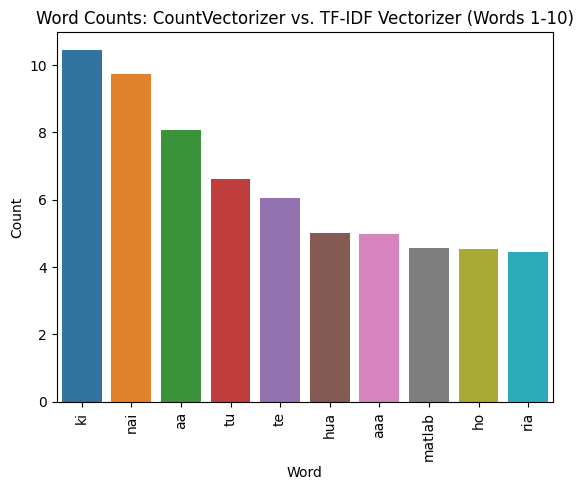

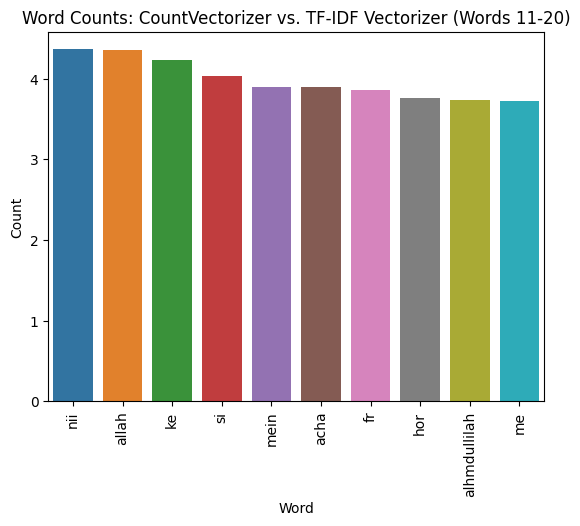

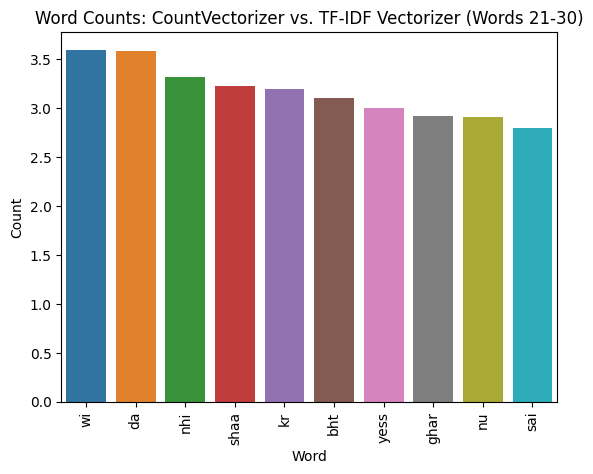

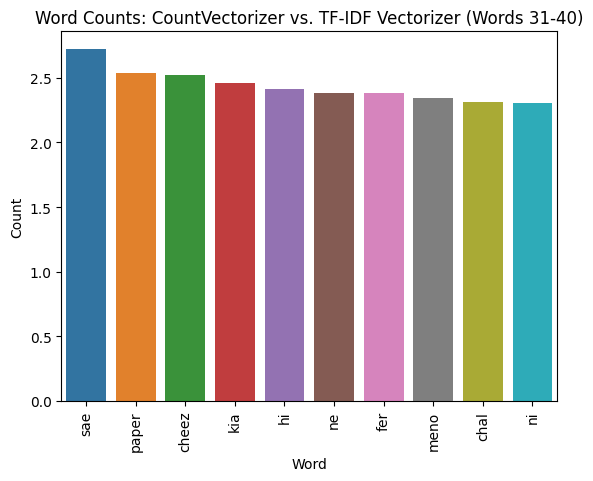

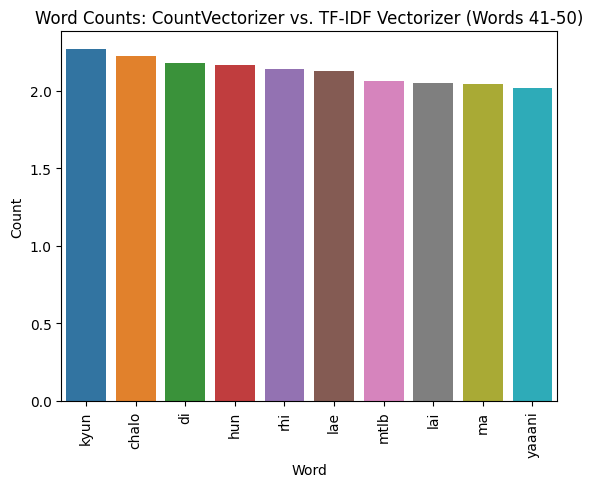

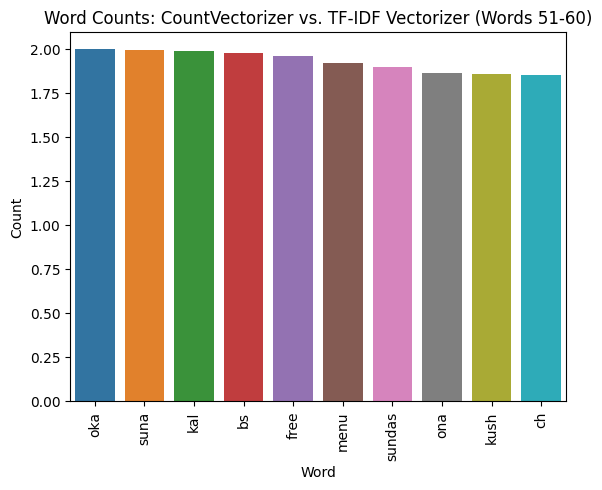

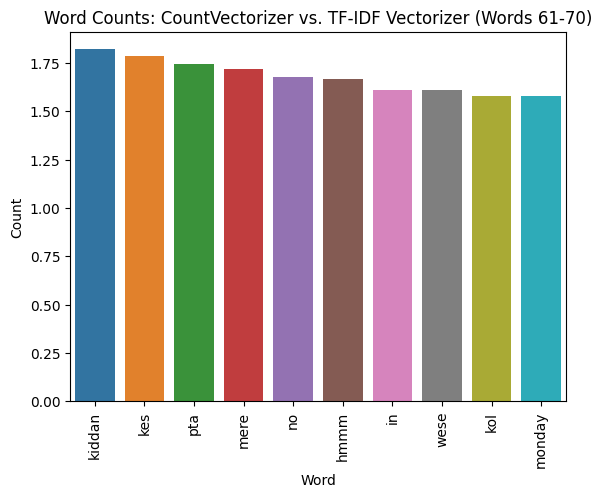

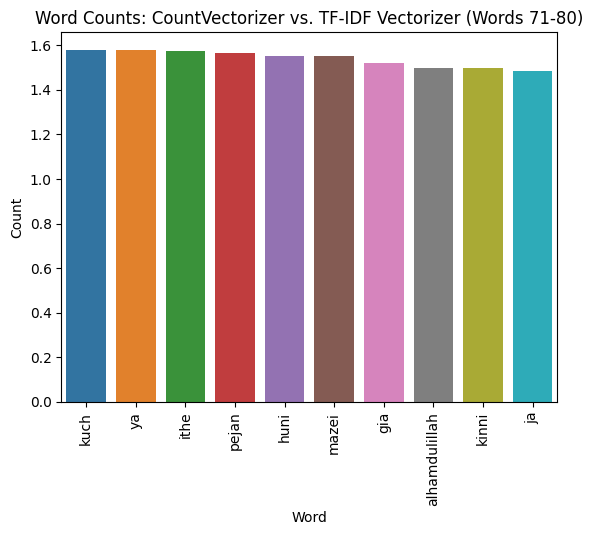

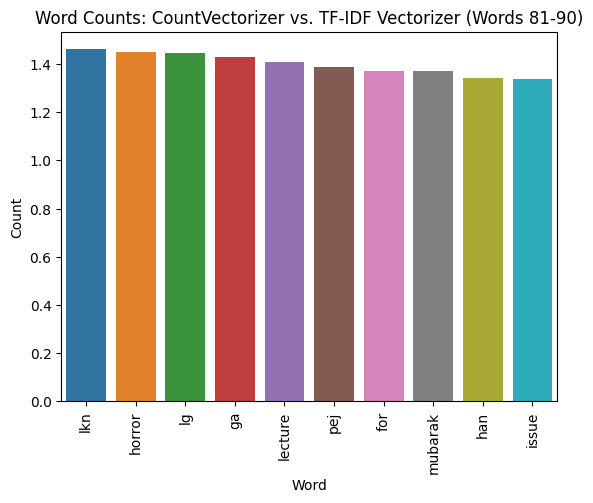

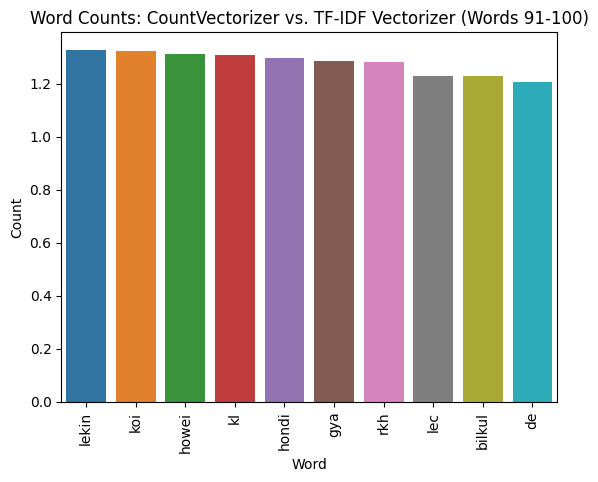

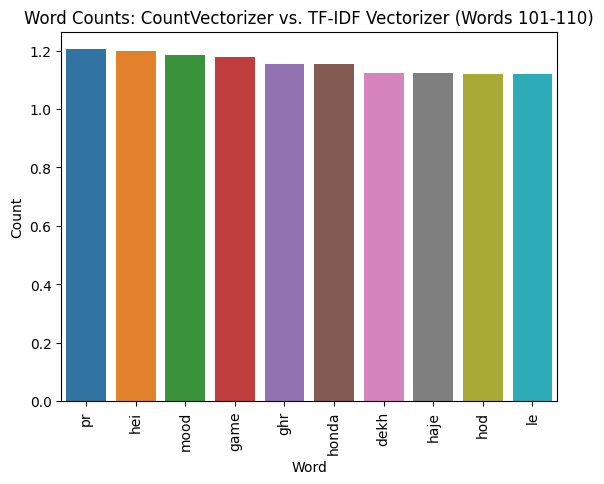

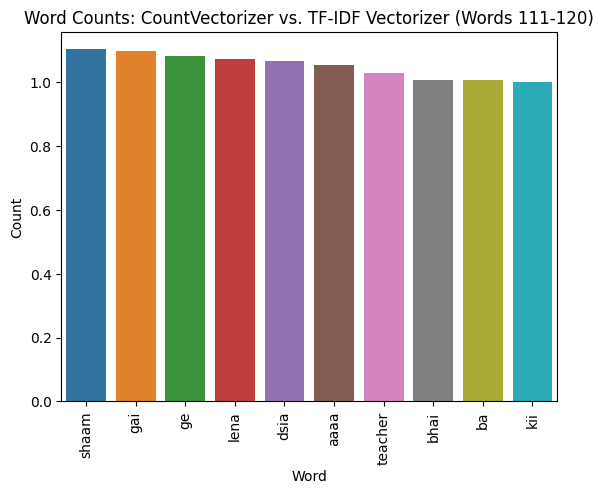

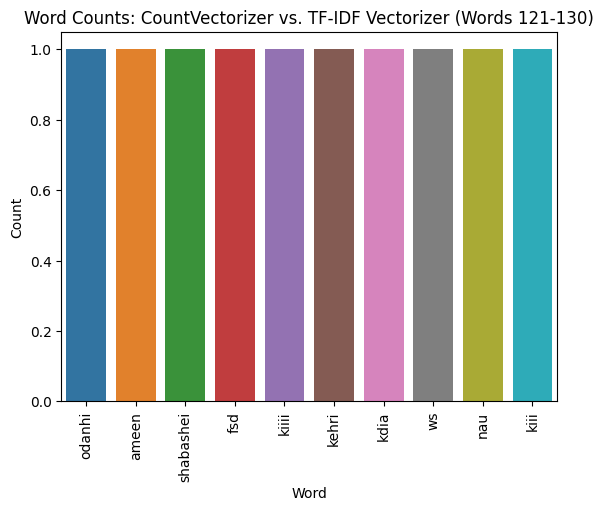

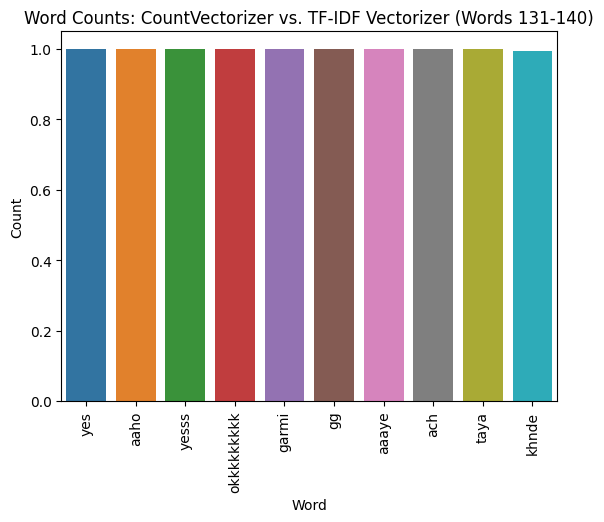

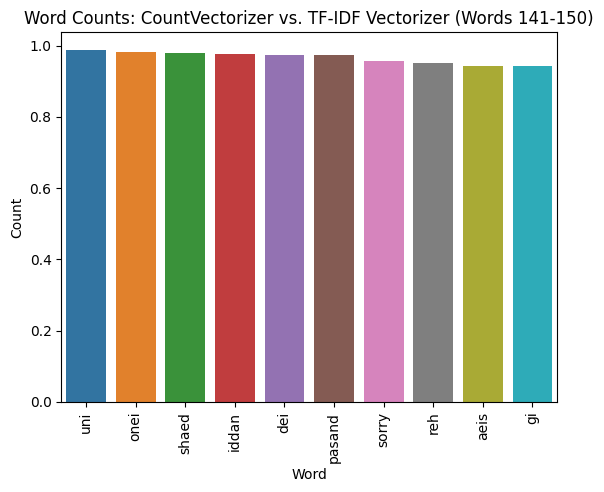

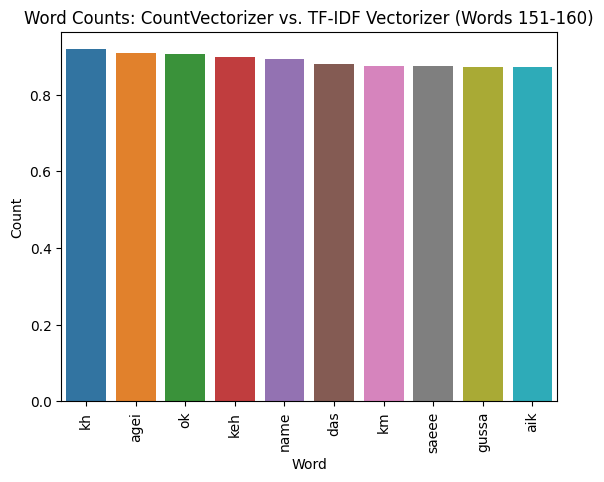

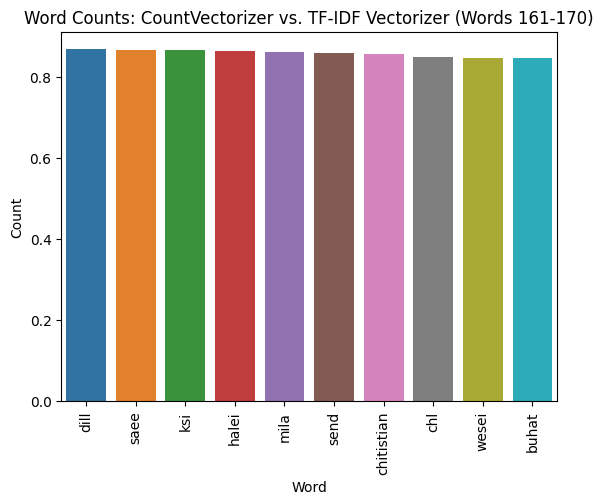

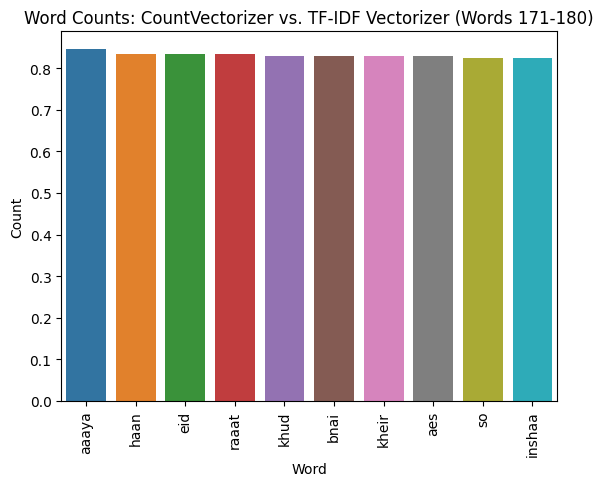

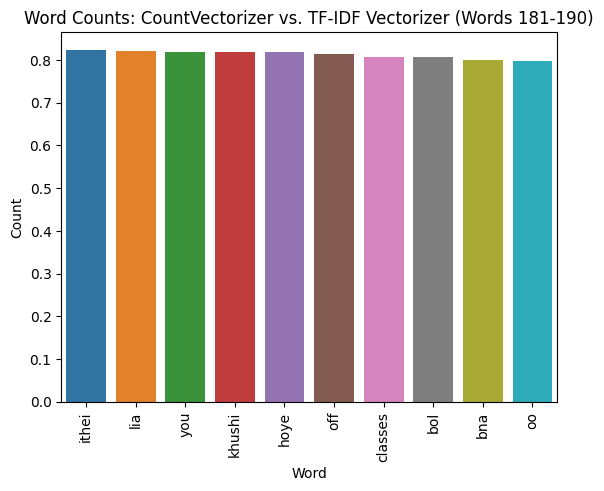

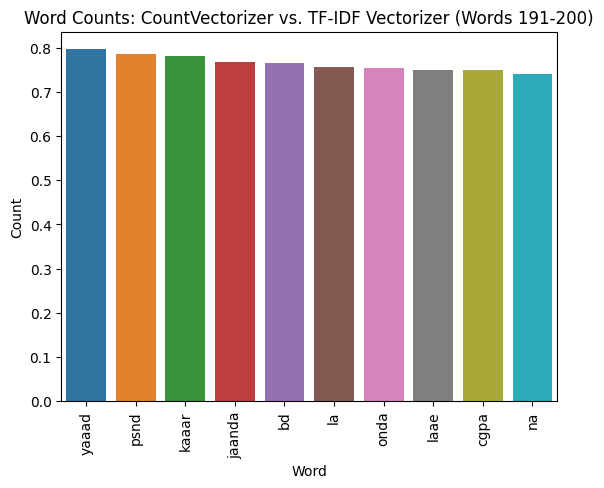

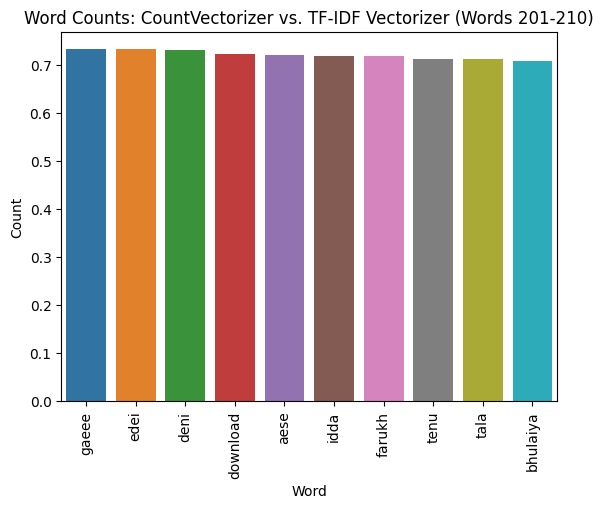

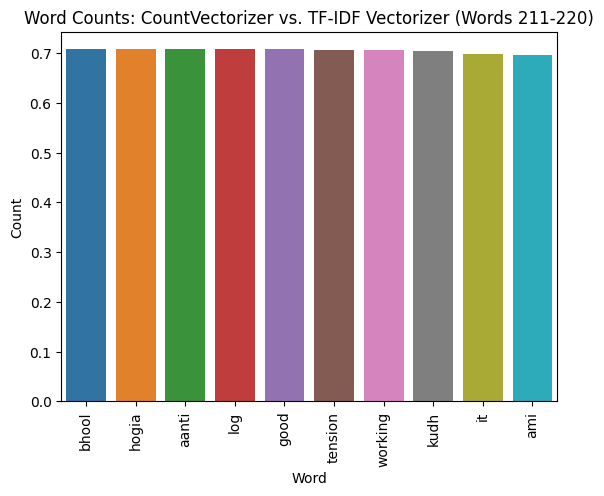

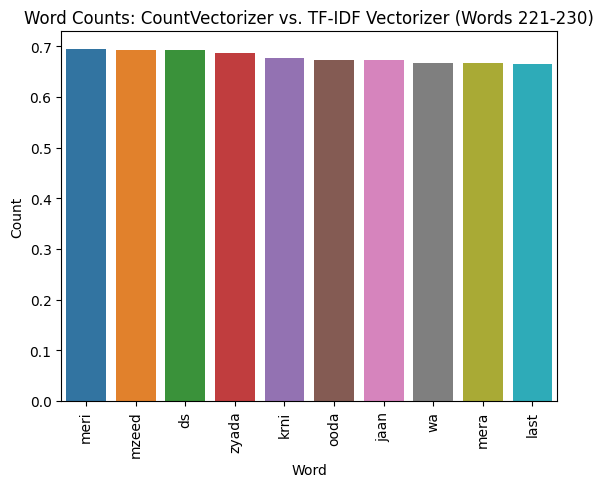

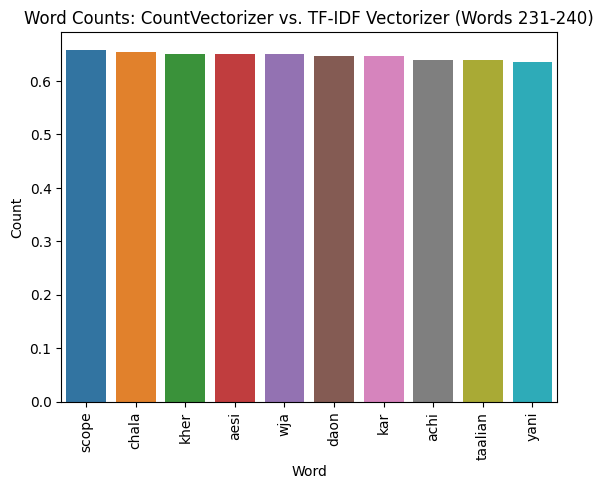

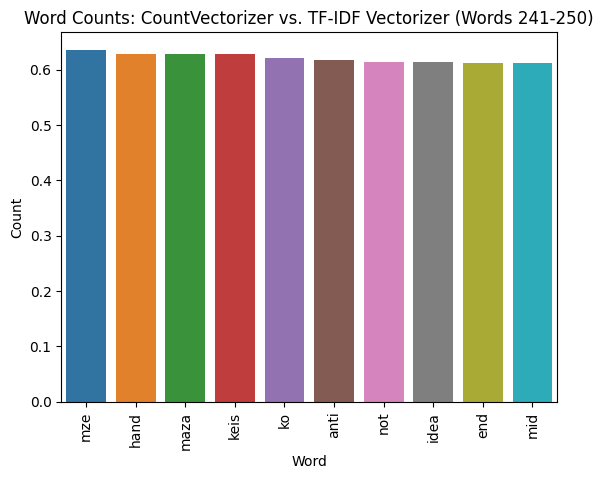

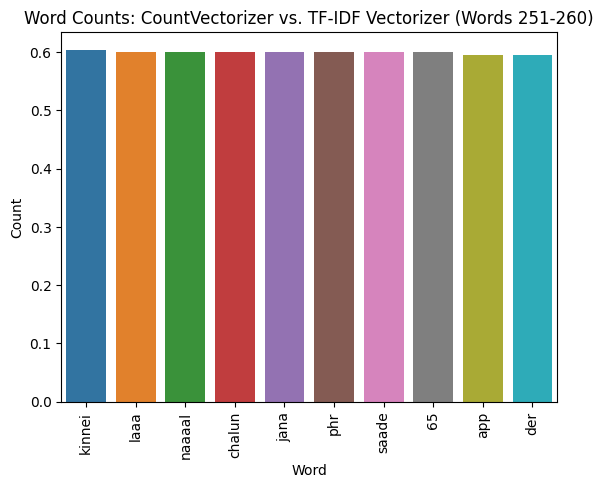

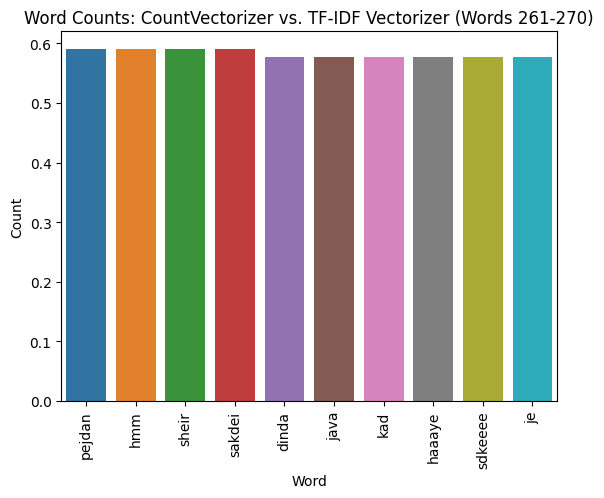

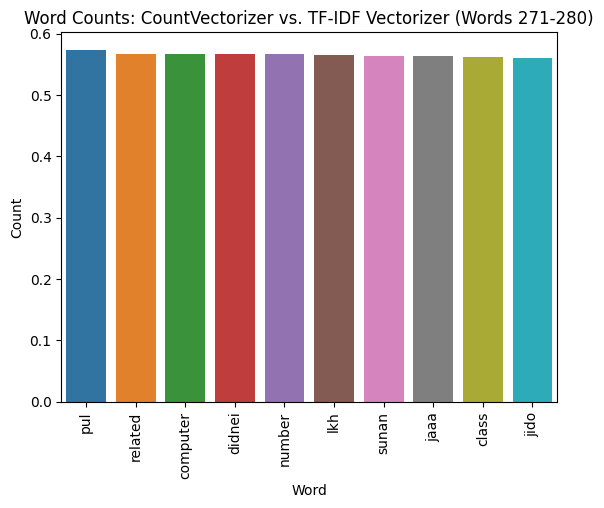

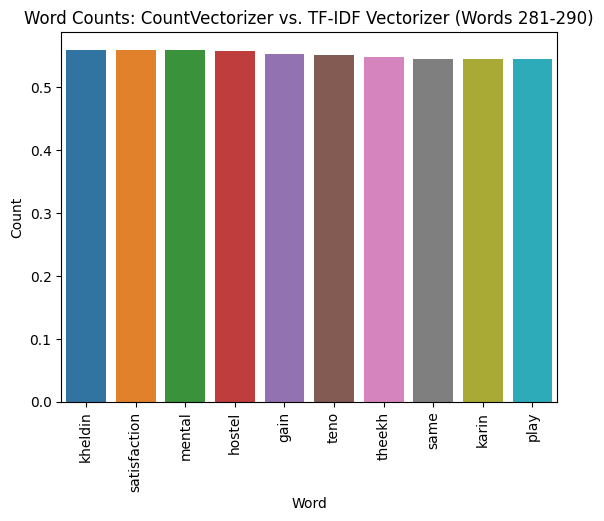

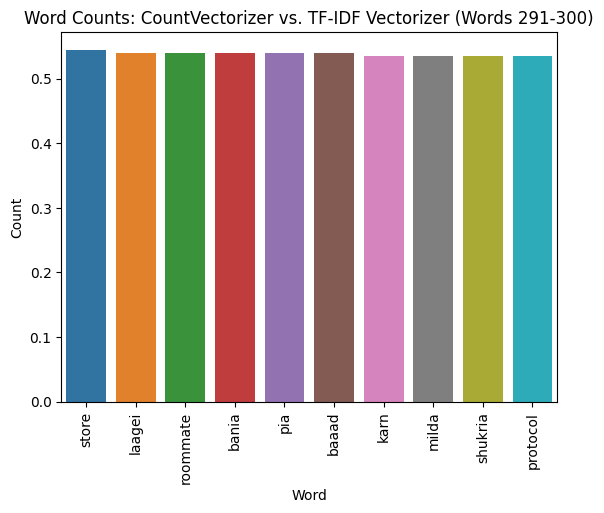

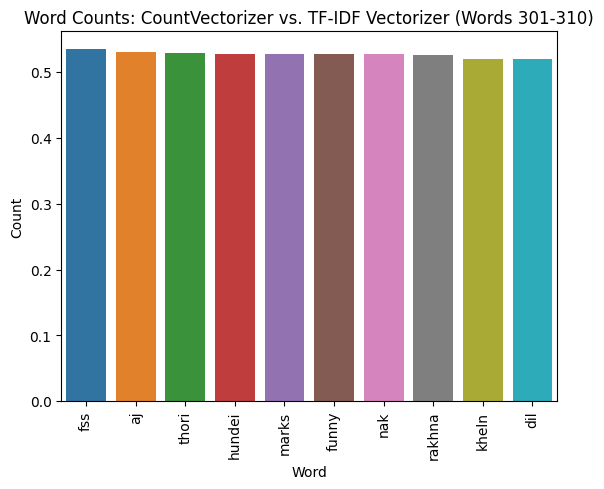

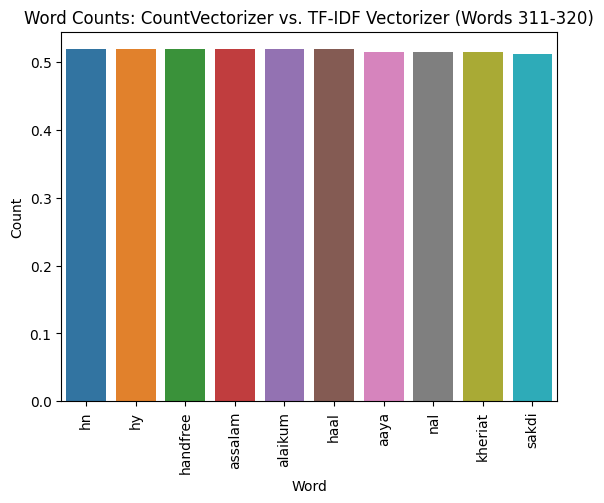

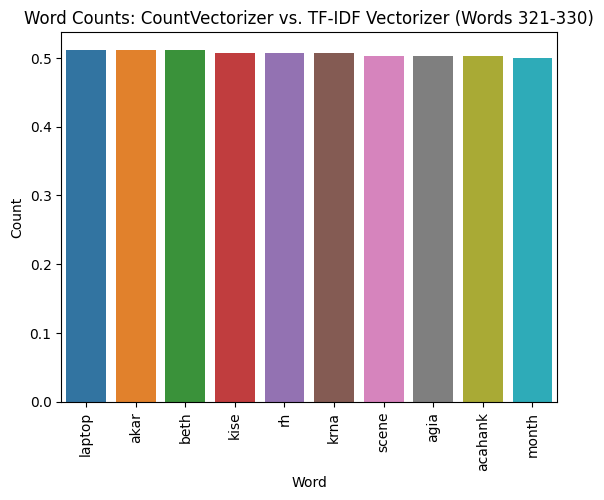

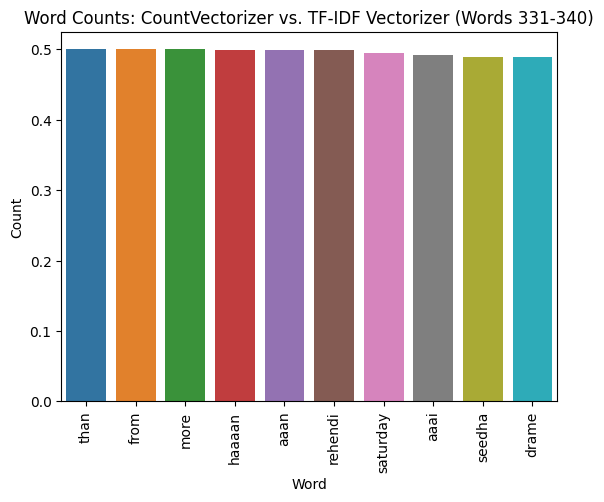

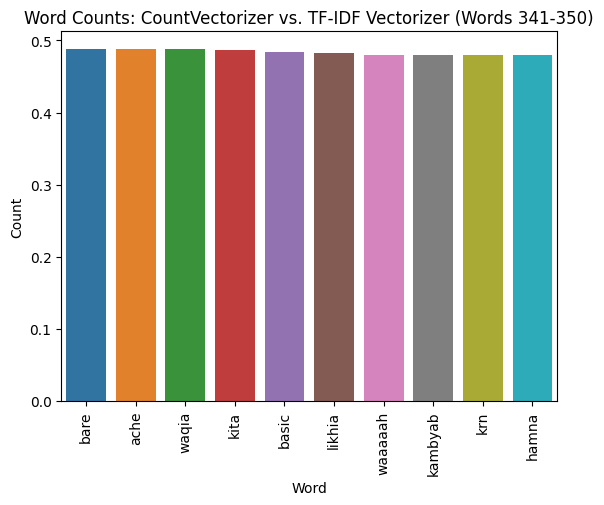

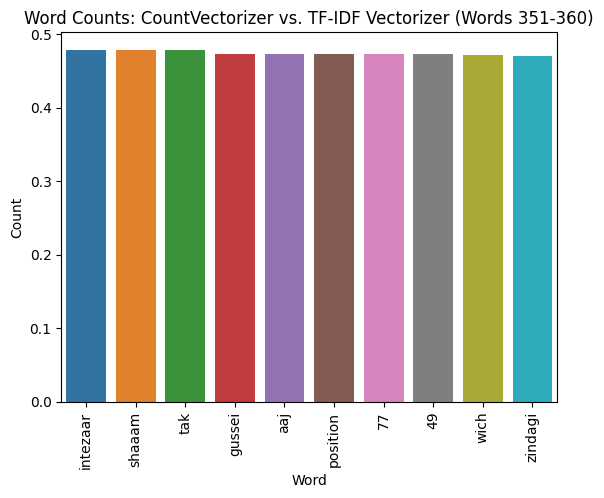

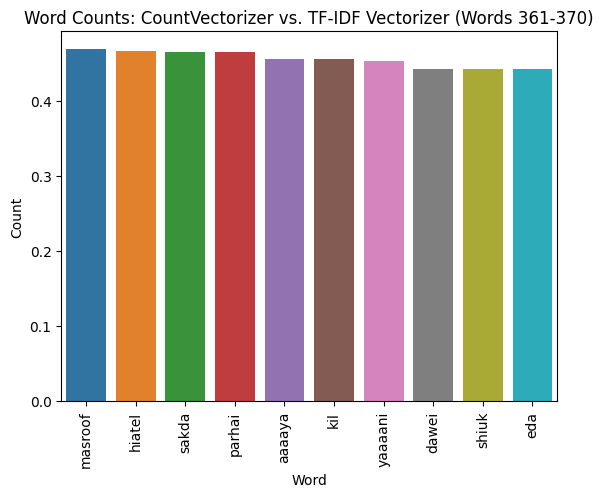

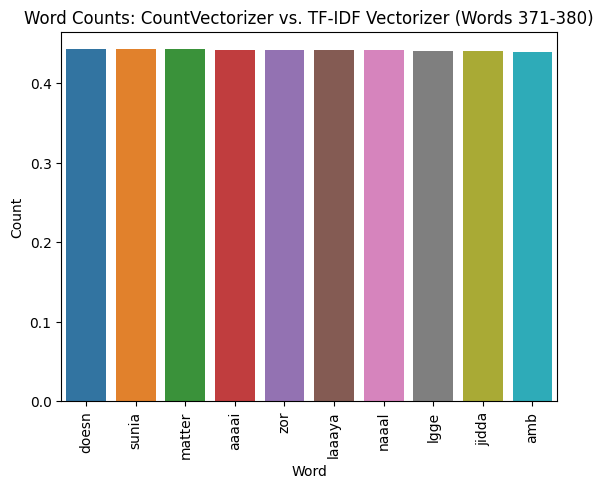

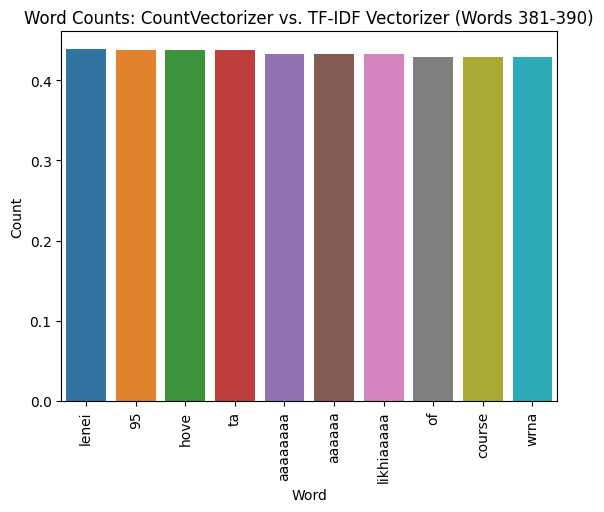

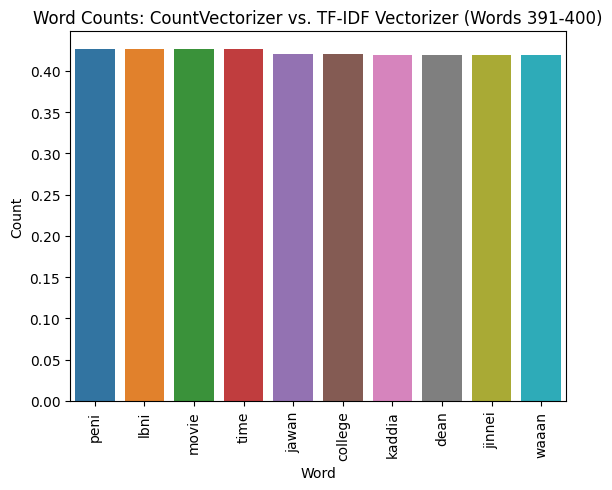

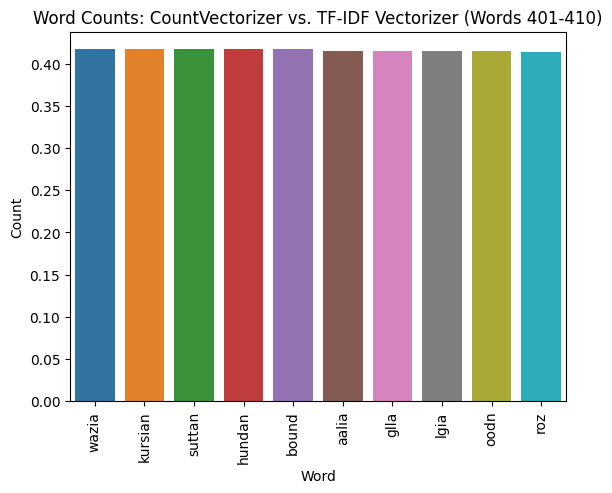

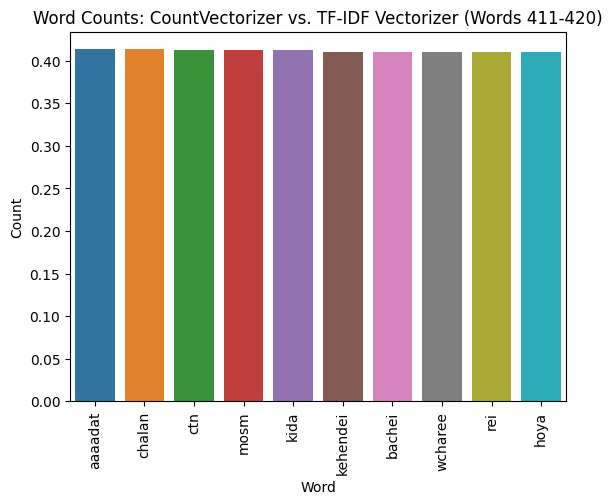

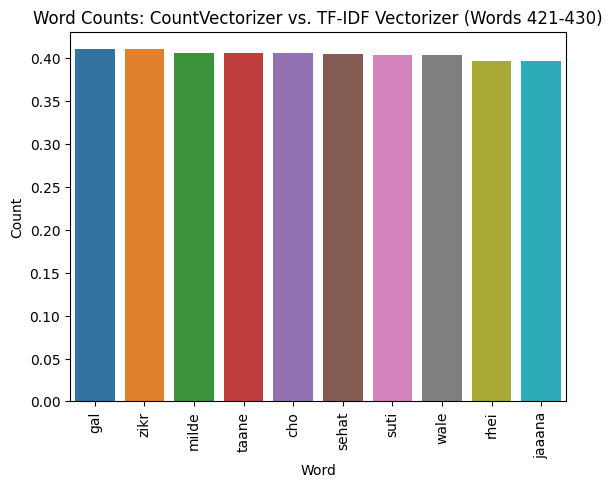

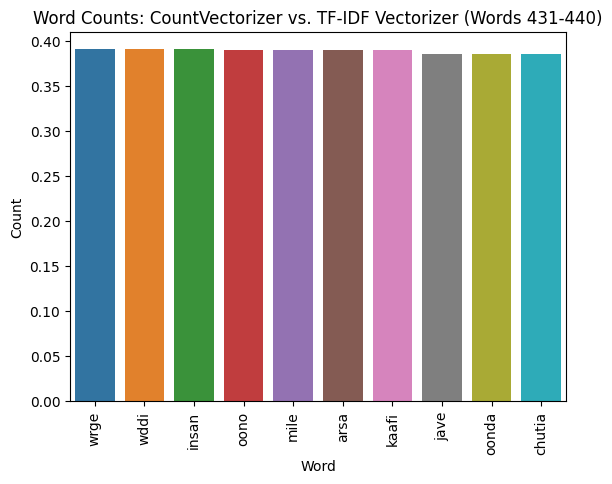

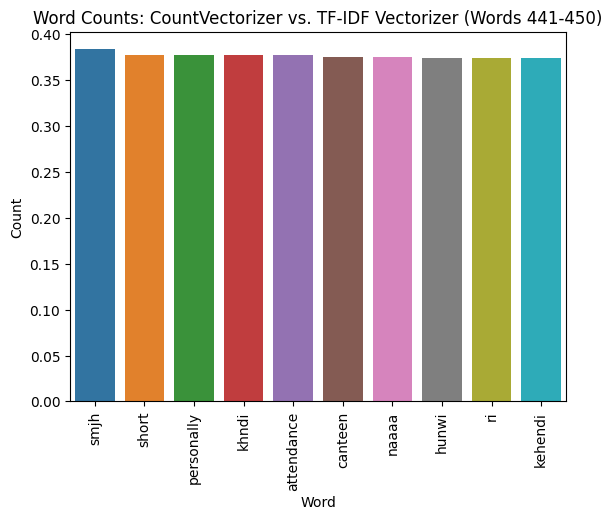

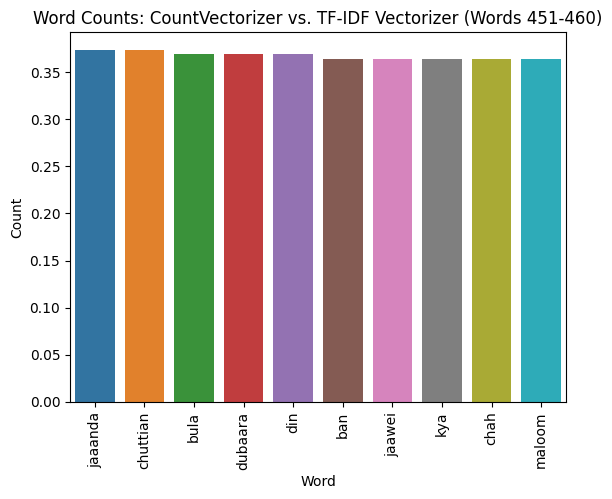

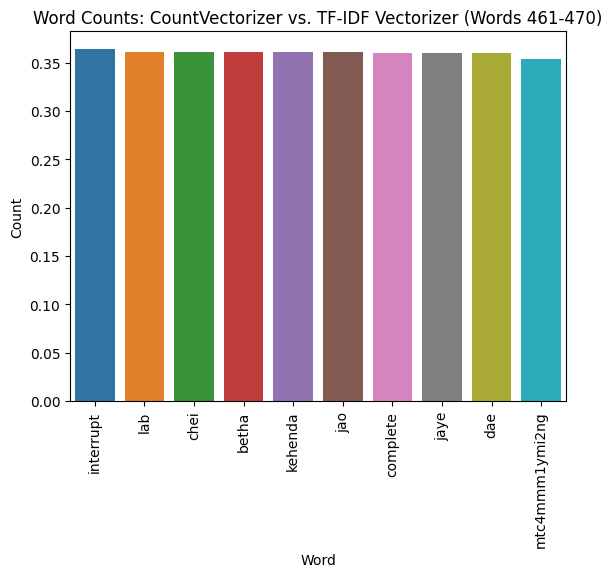

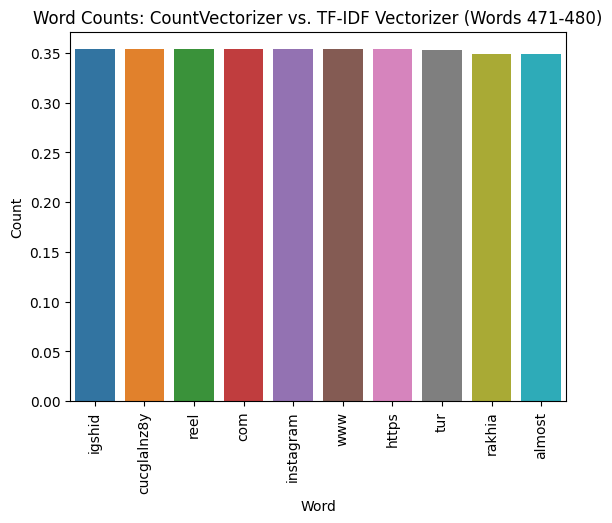

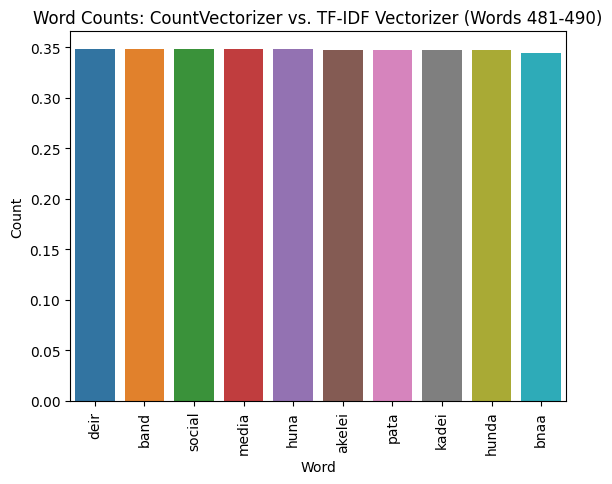

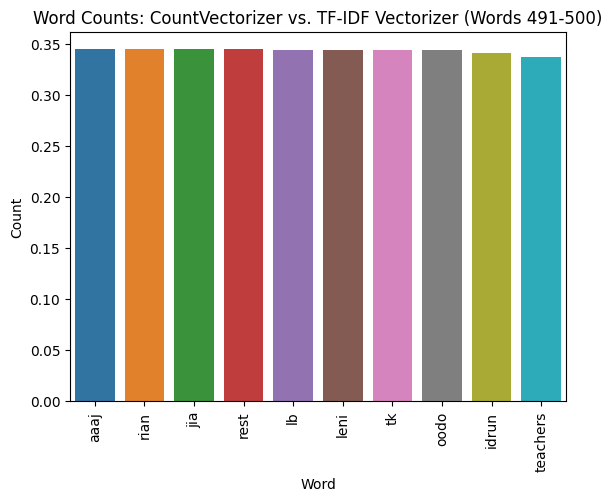

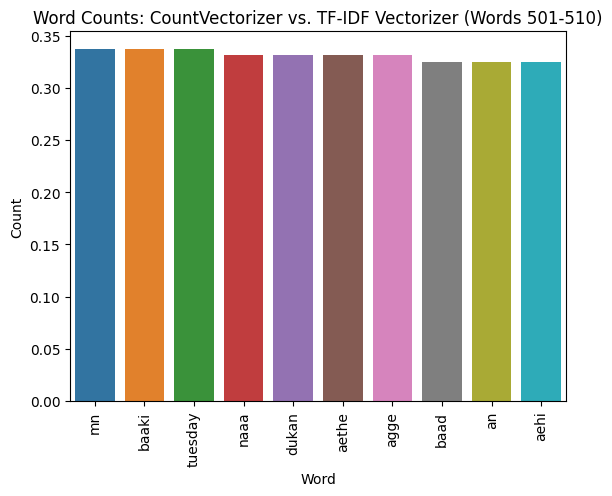

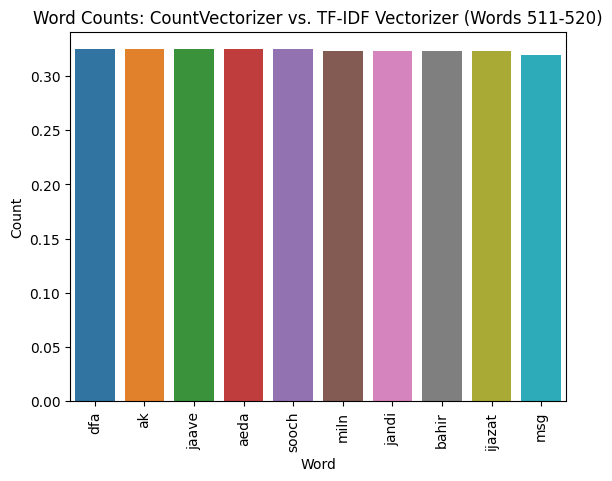

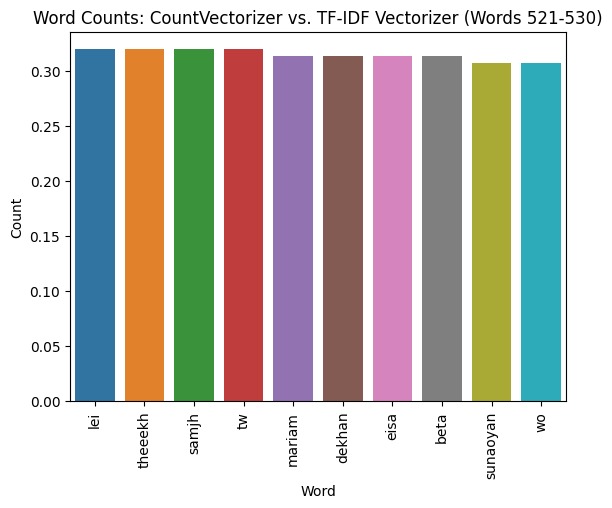

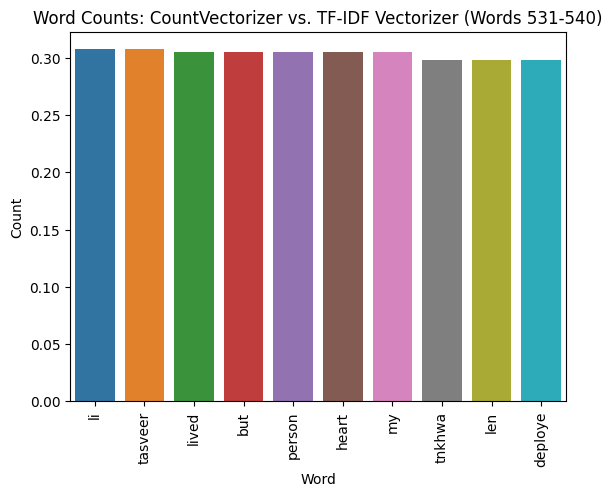

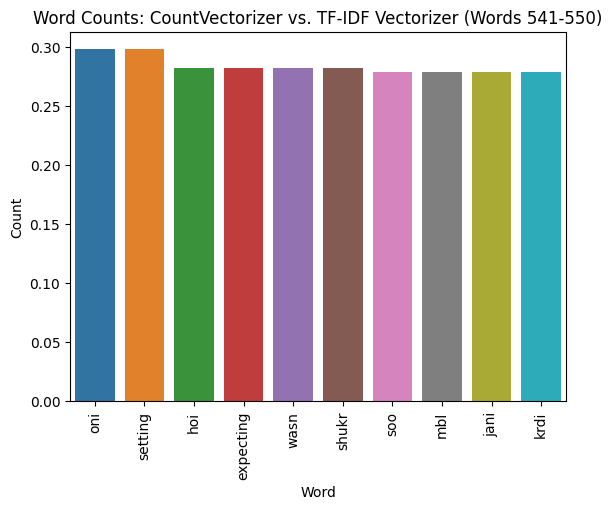

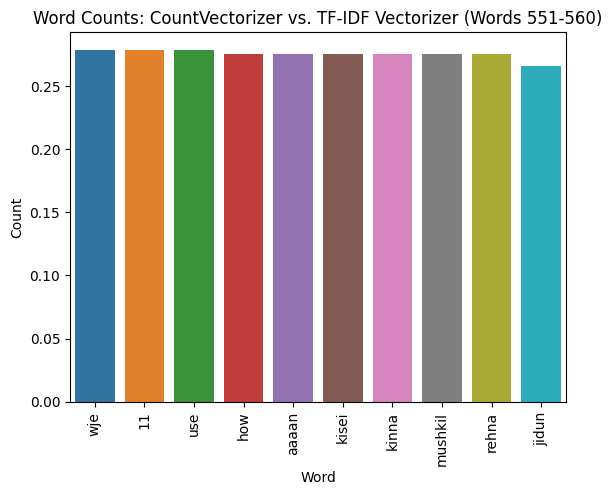

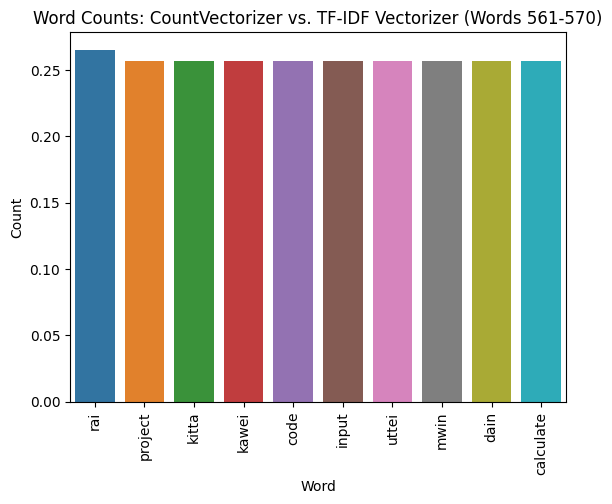

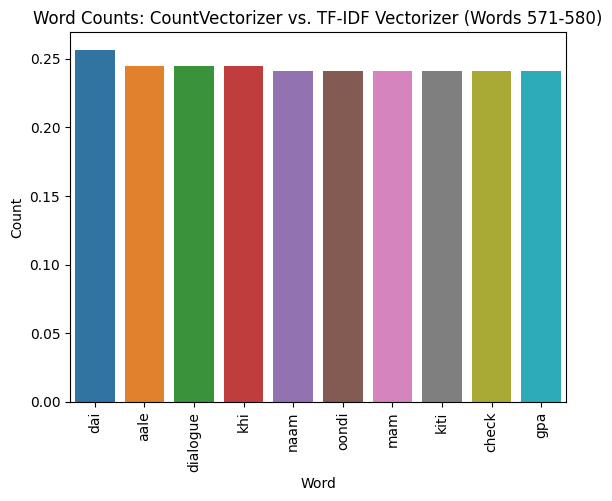

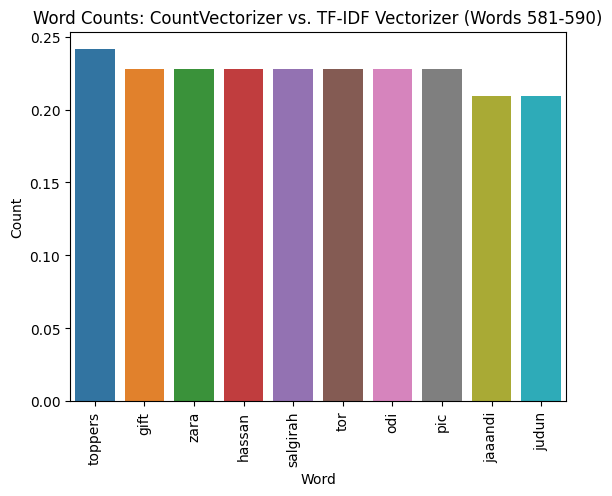

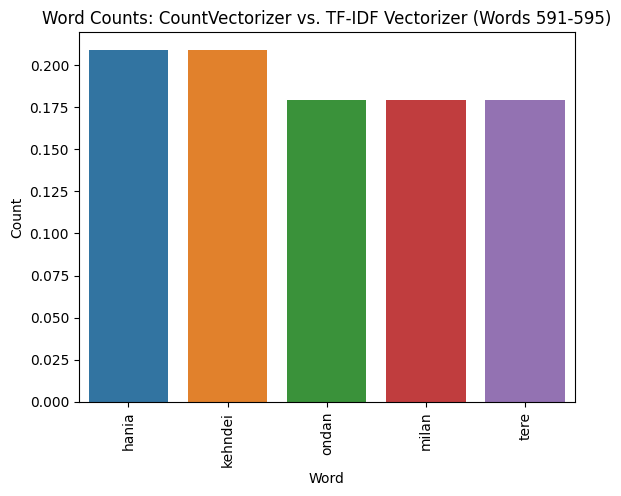

In [179]:
# Define the number of words to display in each plot
sequence_length = 10

# Combine the word counts from CountVectorizer and TF-IDF Vectorizer into a single dictionary
combined_word_counts = {**count_word_counts, **tfidf_word_counts}

# Create a DataFrame with combined word counts
pl = pd.DataFrame({'Word': list(combined_word_counts.keys()), 'Count': list(combined_word_counts.values())})

# Sort the DataFrame by word count in descending order
pl = pl.sort_values('Count', ascending=False)

# Calculate the total number of sequences
num_sequences = len(pl) // sequence_length

# Iterate through the sequences and create bar plots
for i in range(num_sequences):
    # Get the current sequence of words
    start_index = i * sequence_length
    end_index = start_index + sequence_length
    sequence_pl = pl[start_index:end_index]

    # Plot the current sequence of words
    sns.barplot(x='Word', y='Count', data=sequence_pl)
    plt.title(f'Word Counts: CountVectorizer vs. TF-IDF Vectorizer (Words {start_index+1}-{end_index})')
    plt.xlabel('Word')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

# Check if there are remaining words after the last complete sequence
if len(pl) % sequence_length != 0:
    remaining_pl = pl[num_sequences * sequence_length:]
    sns.barplot(x='Word', y='Count', data=remaining_pl)
    plt.title(f'Word Counts: CountVectorizer vs. TF-IDF Vectorizer (Words {num_sequences*sequence_length+1}-{len(pl)})')
    plt.xlabel('Word')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()


In [176]:
!pipenv install wordcloud

Installing wordcloud...
⠏ ✔ Installation Succeeded.
Pipfile.lock (c7dc71) out of date, updating to (019c0c)...
Locking [packages] dependencies...
⠹ ✔ Success!dependencies....
Locking [dev-packages] dependencies...
Updated Pipfile.lock (d9fca2aa506f391c6ba741d4a60fddae42dff27ac3898267fc1e616950019c0c)!
Installing dependencies from Pipfile.lock (019c0c)...


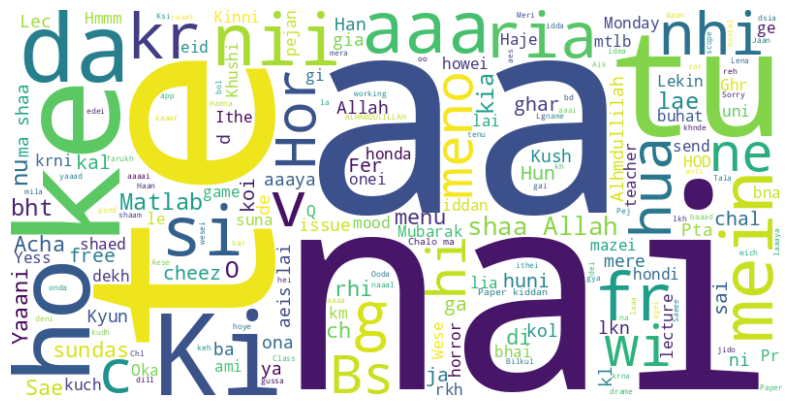

In [203]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the text from the 'Chatting' column into a single string
text = ' '.join(df['Chatting'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
